In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
data = pd.read_excel("IVA_data.xlsx", sheet_name=0)

In [33]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 500

In [28]:
data = data.join(data[["t_outside", "t_606a", "t_606b", "t_611a", "t_611b", "t_627a", "t_627b"]][1:].reset_index(drop=True), rsuffix="_10")
data = data.join(data[["t_outside", "t_606a", "t_606b", "t_611a", "t_611b", "t_627a", "t_627b"]][2:].reset_index(drop=True), rsuffix="_20")
data = data.join(data[["t_outside", "t_606a", "t_606b", "t_611a", "t_611b", "t_627a", "t_627b"]][3:].reset_index(drop=True), rsuffix="_30")
data = data.join(data[["t_outside", "t_606a", "t_606b", "t_611a", "t_611b", "t_627a", "t_627b"]][4:].reset_index(drop=True), rsuffix="_40")
data = data.join(data[["t_outside", "t_606a", "t_606b", "t_611a", "t_611b", "t_627a", "t_627b"]][5:].reset_index(drop=True), rsuffix="_50")
data = data.join(data[["t_outside", "t_606a", "t_606b", "t_611a", "t_611b", "t_627a", "t_627b"]][6:].reset_index(drop=True), rsuffix="_60")

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9209 entries, 0 to 9208
Data columns (total 76 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9209 non-null   datetime64[ns]
 1   Time          9209 non-null   object        
 2   Datetime      9209 non-null   datetime64[ns]
 3   t_outside     9209 non-null   float64       
 4   t_606a        9209 non-null   float64       
 5   t_606b        9209 non-null   float64       
 6   t_611a        9209 non-null   float64       
 7   t_611b        9209 non-null   float64       
 8   t_627a        9209 non-null   float64       
 9   t_627b        9209 non-null   float64       
 10  4a4           9209 non-null   float64       
 11  4a3           9209 non-null   float64       
 12  4a2           9209 non-null   float64       
 13  4a1           9209 non-null   float64       
 14  4b1           9209 non-null   float64       
 15  4b2           9209 non-null   float64 

In [34]:
data[-3:]

,Date,Time,Datetime,t_outside,t_606a,t_606b,t_611a,t_611b,t_627a,t_627b,4a4,4a3,4a2,4a1,4b1,4b2,4b3,4b4,5a4,5a3,5a2,5a1,5b1,5b2,5b3,5b4,6a4,6a3,6a2,6a1,6b1,6b2,6b3,6b4,t_outside_10,t_606a_10,t_606b_10,t_611a_10,t_611b_10,t_627a_10,t_627b_10,t_outside_20,t_606a_20,t_606b_20,t_611a_20,t_611b_20,t_627a_20,t_627b_20,t_outside_30,t_606a_30,t_606b_30,t_611a_30,t_611b_30,t_627a_30,t_627b_30,t_outside_40,t_606a_40,t_606b_40,t_611a_40,t_611b_40,t_627a_40,t_627b_40,t_outside_50,t_606a_50,t_606b_50,t_611a_50,t_611b_50,t_627a_50,t_627b_50,t_outside_60,t_606a_60,t_606b_60,t_611a_60,t_611b_60,t_627a_60,t_627b_60
9206,2020-08-02,01:19:56,2020-08-02 01:19:56,16.16,27.75,35.90,32.97,33.46,31.06,30.59,11.09,9.359,12.22,9.044,8.683,8.942,9.799,6.315,4.837,12.28,6.449,8.14,5.411,8.620,19.35,14.57,12.1,8.352,9.422,9.186,10.060,5.138,11.62,17.08,16.18,27.76,35.70,32.87,33.36,31.06,30.38,16.29,27.97,35.81,32.87,33.59,31.05,30.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9207,2020-08-02,01:29:56,2020-08-02 01:29:56,16.18,27.76,35.70,32.87,33.36,31.06,30.38,11.12,9.359,12.22,8.942,8.580,8.840,9.799,6.315,4.837,12.14,6.347,8.14,5.309,8.604,19.25,14.47,12.1,8.352,9.422,9.186,9.977,5.138,11.62,16.97,16.29,27.97,35.81,32.87,33.59,31.05,30.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9208,2020-08-02,01:39:56,2020-08-02 01:39:56,16.29,27.97,35.81,32.87,33.59,31.05,30.38,10.96,9.359,12.22,9.044,8.580,8.840,9.799,6.300,4.837,12.12,6.347,8.14,5.309,8.604,19.13,14.37,12.1,8.352,9.422,9.186,9.780,5.138,11.62,16.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data = data.dropna()

In [40]:
df_4a4 = data[["4a4", "t_outside", "t_606a", "t_606b", "t_outside_10", "t_606a_10", "t_606b_10","t_outside_20", "t_606a_20", "t_606b_20","t_outside_30", "t_606a_30", "t_606b_30","t_outside_40", "t_606a_40", "t_606b_40","t_outside_50", "t_606a_50", "t_606b_50","t_outside_60", "t_606a_60", "t_606b_60"]]

In [41]:
df_4a4.head()

,4a4,t_outside,t_606a,t_606b,t_outside_10,t_606a_10,t_606b_10,t_outside_20,t_606a_20,t_606b_20,t_outside_30,t_606a_30,t_606b_30,t_outside_40,t_606a_40,t_606b_40,t_outside_50,t_606a_50,t_606b_50,t_outside_60,t_606a_60,t_606b_60
0,8.266,24.36,28.29,34.74,24.55,28.52,34.85,24.94,28.66,34.95,24.85,28.77,35.06,24.89,28.85,35.06,25.15,28.94,35.17,24.74,28.93,35.17
1,8.313,24.55,28.52,34.85,24.94,28.66,34.95,24.85,28.77,35.06,24.89,28.85,35.06,25.15,28.94,35.17,24.74,28.93,35.17,24.32,28.95,35.27
2,8.313,24.94,28.66,34.95,24.85,28.77,35.06,24.89,28.85,35.06,25.15,28.94,35.17,24.74,28.93,35.17,24.32,28.95,35.27,24.79,29.14,35.27
3,8.313,24.85,28.77,35.06,24.89,28.85,35.06,25.15,28.94,35.17,24.74,28.93,35.17,24.32,28.95,35.27,24.79,29.14,35.27,25.34,29.26,35.37
4,8.415,24.89,28.85,35.06,25.15,28.94,35.17,24.74,28.93,35.17,24.32,28.95,35.27,24.79,29.14,35.27,25.34,29.26,35.37,25.09,29.17,35.48


In [42]:
df_4a4.isna().any()

4a4             False
t_outside       False
t_606a          False
t_606b          False
t_outside_10    False
t_606a_10       False
t_606b_10       False
t_outside_20    False
t_606a_20       False
t_606b_20       False
t_outside_30    False
t_606a_30       False
t_606b_30       False
t_outside_40    False
t_606a_40       False
t_606b_40       False
t_outside_50    False
t_606a_50       False
t_606b_50       False
t_outside_60    False
t_606a_60       False
t_606b_60       False
dtype: bool

In [45]:
y_4a4 = df_4a4["4a4"]
X_4a4 = df_4a4.drop("4a4", axis=1)

In [47]:
X_4a4_train, X_4a4_test, y_4a4_train, y_4a4_test = train_test_split(X_4a4, y_4a4, test_size=0.2, random_state=1)

In [48]:
model_4a4 = LinearRegression()
model_4a4.fit(X_4a4_train, y_4a4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print("Train score:")
print(model_4a4.score(X_4a4_train, y_4a4_train))
print("Test score:")
print(model_4a4.score(X_4a4_test, y_4a4_test))

Train score:
0.03792626687381351
Test score:
0.041872330420520965


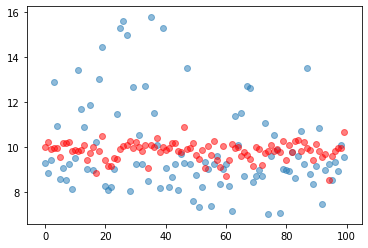

In [64]:
y_4a4_predicted = model_4a4.predict(X_4a4_test)
plt.scatter(range(100), y_4a4_test[:100], alpha=0.5)
plt.scatter(range(100), y_4a4_predicted[:100], alpha=0.5, color="red")
plt.show()